# Data info

Link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

**People**

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

# Prepare

## Set up

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Get data

In [3]:
# set the path of the CSV file in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/MindX Practice/BI/marketing_campaign.csv'

# load the CSV file into a DataFrame
marketing_campaign = pd.read_csv(file_path)

# display data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# copy dataframe
mc = marketing_campaign.copy()

# view the dataframe
mc.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


# Clean data

## Checking data

In [ ]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
# no duplicated
mc.duplicated().sum()

0

In [ ]:
mc['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
# 'Income' has null values
mc.isna().sum()

In [ ]:
# check columns format
mc.columns

for x in mc.columns:
  print(x)

In [ ]:
mc['Year_Birth'].value_counts()

In [ ]:
# there are some people born in 1899, 1893 and 1900 --- considering refill mean value
# view the data
mc[(mc['Year_Birth'] == 1899)|(mc['Year_Birth'] == 1893)|(mc['Year_Birth'] == 1900)]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


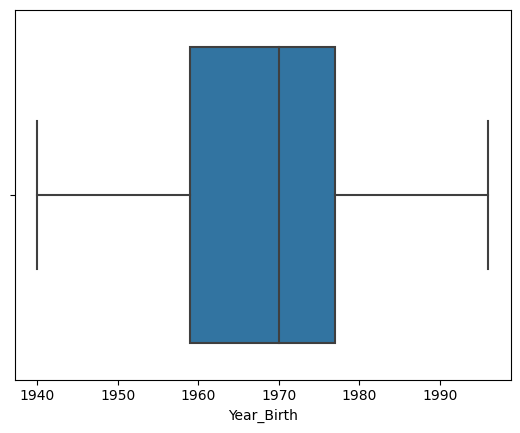

In [ ]:
# Checking outliers in 'year_birth'
sns.boxplot(data = mc
              , x = 'Year_Birth')

plt.show()

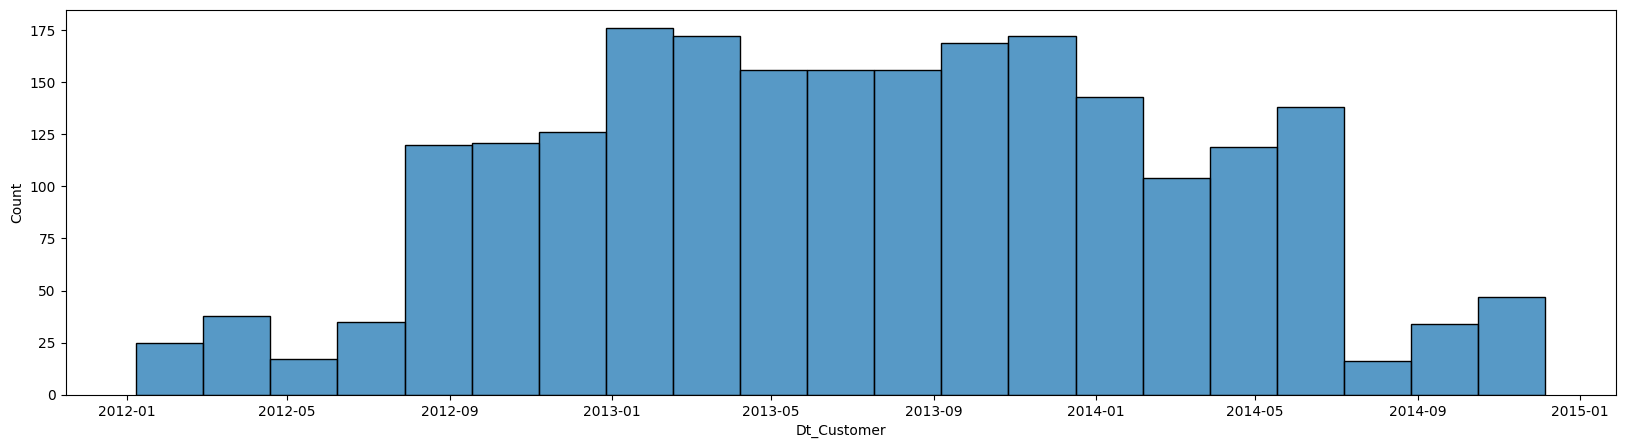

In [ ]:
# Checking outliers in 'Dt_customer'
plt.figure(figsize = (20,5))
sns.histplot(data = mc
              , x = 'Dt_Customer')

plt.show()

In [ ]:
# count 'Education' values
mc['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
# Check duplicate in 'ID'
mc.duplicated('ID').sum()

0

In [ ]:
mc[['Z_CostContact', 'Z_Revenue']].value_counts()

# there only 1 number in each group, there are not much values.

Z_CostContact  Z_Revenue
3              11           2240
dtype: int64

## Fixing data

In [4]:
# column 'Income' has null values -- fill in values by the mean of Income
mc = mc.fillna(mc['Income'].mean())

# date column 'Dt_Customer' is not in datatime datatype -- change datatype
mc['Dt_Customer'] = pd.to_datetime(mc['Dt_Customer'])

<ipython-input-4-b7166090f7a6>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mc['Dt_Customer'] = pd.to_datetime(mc['Dt_Customer'])


In [5]:
# considering that the data were incorrectly fill -- change to the mean data
mc.loc[mc['Year_Birth'] <= 1900, 'Year_Birth'] = int(mc['Year_Birth'].mean())

In [6]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
# Delete 2 columns 'Z_CostContact', 'Z_Revenue'
mc = mc[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
         'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
         'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
         'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain','Response']]

# RFM model

## Calculate indicators

### Recency

 R (Recency):

- Lần mua hàng gần nhất trong khoảng 3 ngày trước: 5đ
- Lần mua hàng gần nhất trong khoảng 1 tuần trước: 4đ
- Lần mua hàng gần nhất trong khoảng 2 tuần trước: 3đ
- Lần mua hàng gần nhất trong khoảng 1 tháng trước: 2đ
- Lần mua hàng gần nhất trong khoảng 3 tháng trước: 1đ

In [ ]:
mc['Recency'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Recency
Non-Null Count  Dtype
--------------  -----
2240 non-null   int64
dtypes: int64(1)
memory usage: 17.6 KB


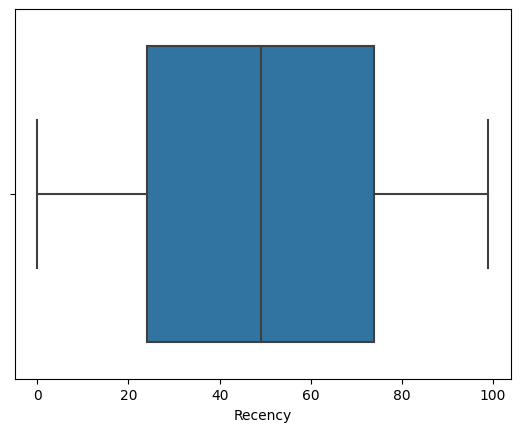

In [27]:
# Draw recency plot

sns.boxplot(data = mc
             , x = 'Recency')

plt.show()

# no outliers

In [23]:
# Create def to calculate recency point

# 3 ngày trước = 3 days: 5đ
# 1 tuần trước = 7 days: 4đ
# 2 tuần trước = 14 days: 3đ
# 1 tháng trước = 30 days: 2đ
# 3 tháng trước = 90 days: 1đ

def recency_point(x):
  if x >= 90:
    return 0
  elif x >= 30:
    return 1
  elif x >= 14:
    return 2
  elif x <= 7:
    return 3
  elif x <=3:
    return 4
  else:
    return 5

In [25]:
mc['Recency_point'] = mc['Recency'].apply(recency_point)

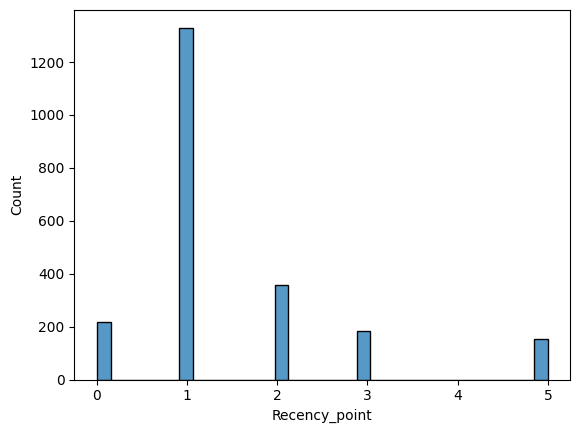

In [28]:
# draw recency_point plot
sns.histplot(data = mc
             , x = 'Recency_point')

plt.show()

### Frequency

How often customer purchase from company?

 F (Frequency):

 - 2 lần/ tuần: 5đ
 - 1 lần/ tuần: 4đ
 - 1 lần/ 2 tuần: 3đ
 - 1 lần/ 1 tháng: 2đ
 - 1 lần/ 6 tháng: 1đ

To calculate Frequency:

  - Considered that customer only purchase from the company only when they enrolled.

Using:

- Calculate customer duration since enrolled.

  (Last day of their purchase (don't have that - exchange to the data latest update date, which is 31/12/2021) - the day of their enrollment)
- Calculate total times they purchased from the company by summing all the Place columns.
- Devide duration/ total_times to see how often their purchase

In [38]:
mc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Response', 'Duration', 'Number_purchases',
       'Frequency', 'Recency_point'],
      dtype='object')

In [29]:
mc['Duration']

Timestamp('2014-12-06 00:00:00')

In [34]:
# Calculate duration

mc['Duration'] = (datetime(2014, 12, 31) - mc['Dt_Customer'])

# calculate times of purchase

mc['Number_purchases'] = mc['NumWebPurchases'] + mc['NumCatalogPurchases'] + mc['NumStorePurchases']

# calculate frequency

mc['Frequency'] = (mc['Duration'] / mc['Number_purchases']).dt.days

mc['Frequency'].fillna(0).astype(int)

0        45
1        37
2        24
3        15
4        24
5        23
6        45
7        64
8       114
9       293
10      137
11      155
12       27
13       34
14      203
15       30
16      122
17       77
18       26
19      170
20       79
21       20
22       52
23        3
24       50
25      116
26       58
27       25
28       82
29       16
30       37
31       42
32      116
33       72
34       39
35       97
36       15
37      115
38       11
39       33
40       32
41       78
42      245
43       74
44      137
45       12
46      120
47      146
48       52
49       45
50        1
51       27
52      139
53        8
54       24
55       29
56       34
57       49
58      112
59       18
60       31
61       50
62       34
63       23
64       37
65      147
66       18
67        9
68       27
69       42
70       43
71      139
72       25
73       31
74       35
75      247
76       47
77       34
78      210
79       36
80      106
81      185
82      110
83  

In [32]:
mc[mc['Frequency'] == 91]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Duration,Number_purchases,Frequency,Recency_point
67,9369,1979,2n Cycle,Single,88194.0,0,1,2014-03-19,19,688,14,309,201,24,38,1,11,10,10,5,1,0,1,0,0,0,1,2844 days,31,91.0,2


In [36]:
mc['Frequency'].describe()

count    2234.000000
mean       63.741271
std        62.183535
min         1.000000
25%        28.000000
50%        43.000000
75%        82.000000
max       871.000000
Name: Frequency, dtype: float64

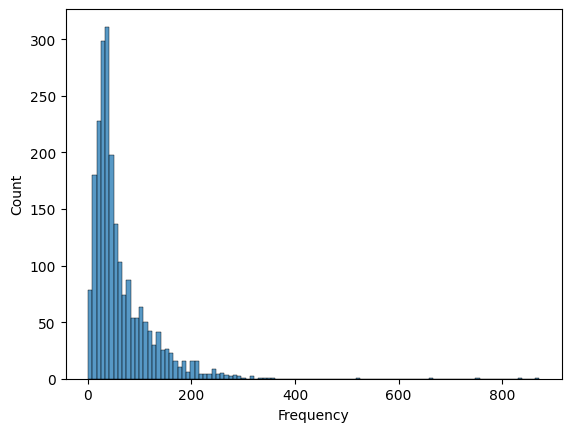

In [37]:
# number_purchase plot

sns.histplot(data = mc
             , x = 'Frequency')

plt.show()

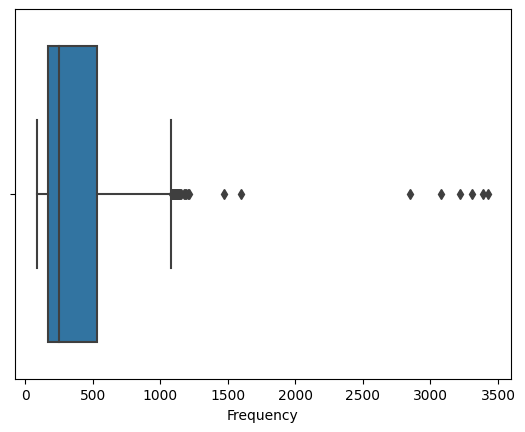

In [12]:
sns.boxplot(data = mc
            , x = 'Frequency'
            )

plt.show()

In [13]:
mc['Frequency'].describe()

count    2234.000000
mean      380.050582
std       299.166507
min        91.000000
25%       167.000000
50%       254.000000
75%       533.500000
max      3428.000000
Name: Frequency, dtype: float64

In [15]:
mc_web_purchase = mc[['NumWebPurchases','NumWebVisitsMonth']].groupby('NumWebPurchases').sum().reset_index()

mc_web_purchase.head()

,NumWebPurchases,NumWebVisitsMonth
0,0,287
1,1,2204
2,2,2131
3,3,1728
4,4,1151


In [16]:
mc.shape

(2240, 30)

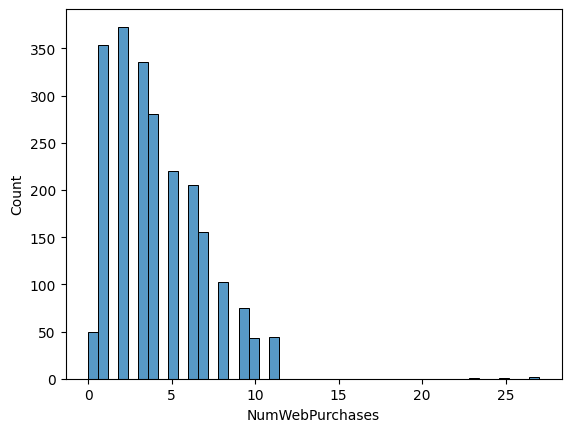

In [19]:
sns.histplot(data = mc
             , x = 'NumWebPurchases'
             )

plt.show()

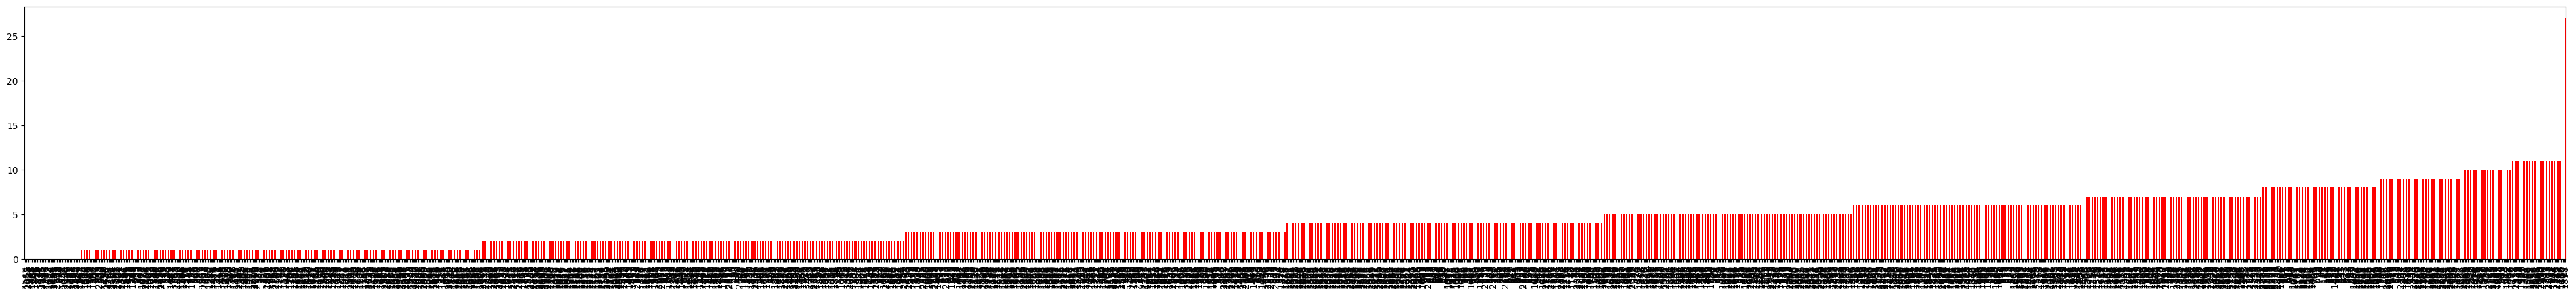

In [20]:
fig, ax = plt.subplots(figsize=(50,5))

sorted_mc = mc.sort_values(by = 'NumWebPurchases', ascending=True)

sorted_mc['NumWebPurchases'].plot(kind='bar', color='red')
# mc['NumWebVisitsMonth'].plot(kind='scatter', color='black', ms=10)

plt.show()

# re-draw?

In [21]:
# create frequency point checking

# 2 lần/ 3,5 days (tuần): 5đ
# 1 lần/ 7 days (tuần): 4đ
# 1 lần/ 14 days (2 tuần): 3đ
# 1 lần/ 30 days (1 tháng): 2đ
# 1 lần/ 180 days (6 tháng): 1đ

def frequency_point(x):
  if x >= 180:
    return 0
  elif x >= 30:
    return 1
  elif x >= 14:
    return 2
  elif x >= 7:
    return 3
  elif x >= 3:
    return 4
  else:
    return 5

In [ ]:
mc['Frequency_point'] = mc['Frequency'].apply(frequency_point)

mc['Frequency_point'].value_counts()

0    1557
1     677
5       6
Name: Frequency_point, dtype: int64

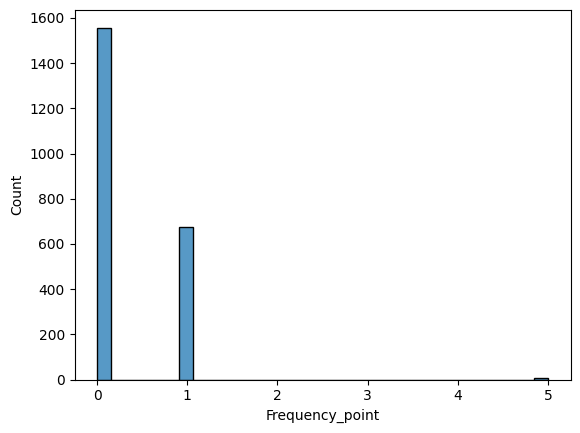

In [ ]:
# frequency plot

sns.histplot(data = mc
             , x = 'Frequency_point')

plt.show()

### Monetary

In [ ]:
mc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Recency_point', 'Duration',
       'Number_purchases', 'Frequency', 'Frequency_point'],
      dtype='object')

In [40]:
# create amount spent

mc['Total_amount'] = mc['MntWines'] + mc['MntFruits'] + mc['MntMeatProducts'] + mc['MntFishProducts'] + mc['MntSweetProducts'] + mc['MntGoldProds']

In [41]:
mc['Total_amount'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_amount, dtype: float64

<Axes: >

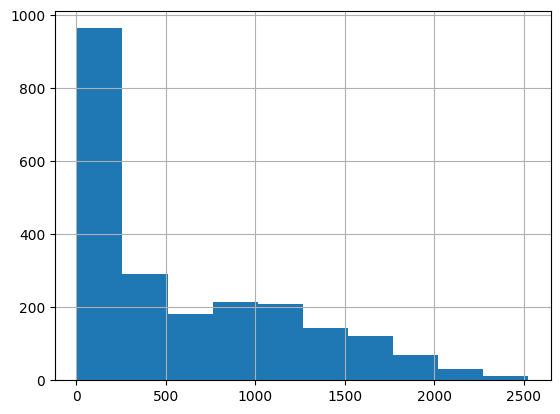

In [42]:
mc['Total_amount'].hist()

In [ ]:
# create monetary check

def monetary_point(x):
  if x < int(mc['Total_amount']*0.8):
    return 5
  elif x < int(mc['Total_amount']*0.6):
    return 4
  elif x < int(mc['Total_amount']*0.4):
    return 3
  elif x < int(mc['Total_amount']*0.2):
    return 2
  else:
    return 1


In [ ]:
mc['Monetary_point'] = mc['Total_amount'].apply(monetary_point)

TypeError: ignored

# Planning section

## Pandas profiling

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!pip install pandas-profiling
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv(‘tên csv file’)
profile = ProfileReport(df)
profile.to_file(output_file='report.html')0

Random note:

Marital_status
Age
Education
nhóm khách hàng nào thích discount
mô hình tham khảo: https://digalyst.com/digital-marketing/mo-hinh-rfm-phan-tich-rfm-lam-marketing-phai-biet/


marketing program:

Tặng discount
cash back
sale


promotion
frequency of take part in promotion campain: marital_status, age, education

## RFM model

Method:
RFM (Recency – Frequency – M (Monetary Value)

     RFM được tạo nên bởi ba yếu tố (điểm cho mỗi chỉ số từ 1 đến 5) nhưng thông thường một doanh nghiệp sẽ sử dụng 2 trên 3 yếu tố này.
     Ví dụ RF, RM, FM.

     R (Recency):

      Lần mua hàng gần nhất trong khoảng 3 ngày trước: 5đ
      Lần mua hàng gần nhất trong khoảng 1 tuần trước: 4đ
      Lần mua hàng gần nhất trong khoảng 2 tuần trước: 3đ
      Lần mua hàng gần nhất trong khoảng 1 tháng trước: 2đ
      Lần mua hàng gần nhất trong khoảng 3 tháng trước: 1đ
     
     F (Frequency):

      2 lần/ tuần: 5đ
      1 lần/ tuần: 4đ
      1 lần/ 2 tuần: 3đ
      1 lần/ 1 tháng: 2đ
      1 lần/ 6 tháng: 1đ
     
     M (Monetary Value):
      According to the business, Monetary can add to the model or not.
      If using Monetary, need to have its own ranking similar to above elements.
     
Result seting:

      Nhóm số 1: VIP nhất. R: 4-5 | F: 4-5: tần suất sử dụng dịch vụ đặt xe là rất cao, và F cũng cao, có nghĩa là khách này đang sử dịch vụ đặt xe của Grab rất thường xuyên và tần suất cao. Đây là nhóm đem lại giá trị lớn nhất, không thể đánh mất.
      Nhóm số 2: Khách trung thành. R: 3-4 | F: 4-5: Nhóm này tuy không thường xuyên đặt xe nhiều như nhóm số 1, nhưng F cao chứng tỏ họ đặt xe của Grab. Và vẫn đều đều sử dụng dịch vụ của chúng ta. Nhóm này giá trị doanh thu có thể ít hơn nhóm 1 một chút, nhưng vẫn cực kỳ quan trọng với doanh nghiệp
      Nhóm số 3: Khách hàng tiềm năng. R: 4-5 | F: 3-4. Nhóm này là những người rất hay đặt xe như nhóm số 1, nhưng F thấp hơn, điều đó có nghĩa họ đang sử dụng một số nền tảng đặt xe khác bên cạnh Grab. Đều chúng ta cần làm với họ là khiến họ chuyển sang sử dụng dịch vụ của Grab thường xuyên hơn, biến họ trở thành nhóm số 1
      Nhóm số 4: Nhóm hứa hẹn. R: 3-4 | F: 0-1. Nhóm này có hay sử dụng dịch vụ đặt xe, nhưng họ lại không thường sử dụng Grab. Với nhóm này ta cần tìm cách lôi kéo họ đến với Grab và sử dụng Grab
      Nhóm số 5: Ít mà vẫn chất: R:1-2 | F: 4-5. R thấp, chứng tỏ họ ít khi đặt xe, nhưng mỗi khi đặt xe họ lại chọn Grab. Có thể họ đã từng là nhóm số 1, nhưng hiện nay họ đã thay đổi nơi làm việc, hoặc có phương tiện cá nhân nên không hay đặt xe nữa. Những khi cần thì họ vẫn chọn Grab, nhóm này có thể giới thiệu người thân, bạn bè của họ sử dụng Grab khi có dịp
      Nhóm số 6: Nguy cơ mất. R: 1-2 | F: 2-3. Nhóm này ít đặt xe, những vẫn thỉnh thoảng sử dụng Grab, nhóm này có nguy cơ trở thành nhóm số 8.
      Nhóm số 7: Gần như đánh mất. R: 2-3 | F: 1-2. Vì lý do nào đó, họ ít đặt xe và cũng không thường sử dụng Grab,
      Nhóm số 8: Người xa lạ. R: 1-2 | F: 1-2. Nhóm này vừa không hay đặt xe, cũng không thường xuyên sử dụng Grab. Đây là nhóm có ít giá trị. Và cần tốn rất nhiều công sức để khiến họ sử dụng dịch vụ đặt xe cũng như sử dụng Grab


In [ ]:
Mô hình RFM

Recency

  Recency: Number of days since customer's last purchase

Frequency

  NumWebPurchases: Number of purchases made through the company’s website
  NumCatalogPurchases: Number of purchases made using a catalogue
  NumStorePurchases: Number of purchases made directly in stores
  NumWebVisitsMonth: Number of visits to company’s website in the last month

Monetary

  MntWines: Amount spent on wine in last 2 years
  MntFruits: Amount spent on fruits in last 2 years
  MntMeatProducts: Amount spent on meat in last 2 years
  MntFishProducts: Amount spent on fish in last 2 years
  MntSweetProducts: Amount spent on sweets in last 2 years
  MntGoldProds: Amount spent on gold in last 2 years

Nhân chủng học

  Year_Birth: Customer's birth year
  Education: Customer's education level
  Marital_Status: Customer's marital status
  Income: Customer's yearly household income
  Kidhome: Number of children in customer's household
  Teenhome: Number of teenagers in customer's household


# Visualization

There are 5 parts of the data so we concatenate them to present data

1. People
2. Products
3. Promotion
4. Place
5. Company

## People to other parts

People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### People with Products

In [ ]:
mc.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [ ]:
# create new dataset
mc_people = mc[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain',
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

mc_people.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,0,635,88,546,172,88,88
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,0,11,1,6,2,1,6


#### Year_birth

In [ ]:
# create columns Age_group by def
# method is calcualte the differences between the year they register to the company and their year birth

def age_cal(year_birth):
  age = 2021 - year_birth
  if age >= 64:
    return 'Seniors (64+)'
  elif age >= 35:
    return 'Adults (35 - 64)'
  elif age >= 25:
    return 'Young Adults (25 - 34)'
  else:
    return 'Youth (<25)'

In [ ]:
age_cal(2000)

'Youth (<25)'

In [ ]:
# create new column
mc_people['Age_group'] = mc_people['Year_Birth'].apply(age_cal)

<ipython-input-13-ae04bd3f2ac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_people['Age_group'] = mc_people['Year_Birth'].apply(age_cal)


In [ ]:
mc_people['Age_group'].value_counts()

# There are no Youth customer

Adults (35 - 64)          1630
Seniors (64+)              463
Young Adults (25 - 34)     147
Name: Age_group, dtype: int64

In [ ]:
# create new table to plot
mc_age_group = mc_people[['Age_group','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby('Age_group').mean().reset_index()

In [ ]:
mc_age_group.head()

,Age_group,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Adults (35 - 64),282.942331,25.305521,153.395706,34.955828,25.800613,41.806748
1,Seniors (64+),381.215983,26.958963,194.373650,43.928726,29.511879,50.479482
2,Young Adults (25 - 34),293.312925,35.285714,230.870748,45.850340,33.346939,48.244898


Text(0.5, 0.98, 'Age_group and products consuming')

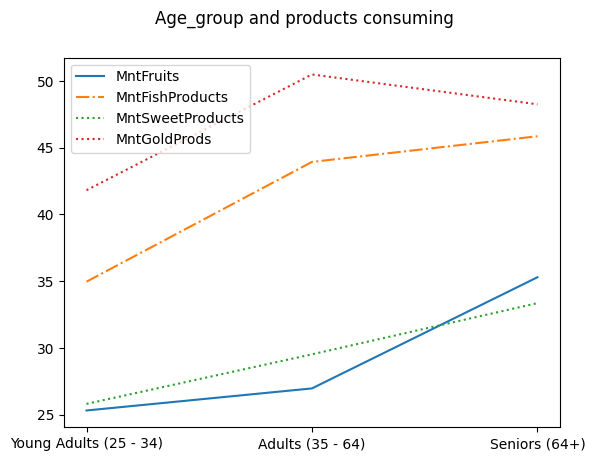

In [ ]:
# Setting a plot
# plt.plot(mc_age_group['Age_group'], mc_age_group['MntWines'], label = "MntWines", linestyle="-")
plt.plot(mc_age_group['Age_group'], mc_age_group['MntFruits'], label = "MntFruits", linestyle="solid")
plt.plot(mc_age_group['Age_group'], mc_age_group['MntFishProducts'], label = "MntFishProducts", linestyle="-.")
plt.plot(mc_age_group['Age_group'], mc_age_group['MntSweetProducts'], label = "MntSweetProducts", linestyle=":")
plt.plot(mc_age_group['Age_group'], mc_age_group['MntGoldProds'], label = "MntGoldProds", linestyle="dotted")

plt.xticks([0, 1, 2],['Young Adults (25 - 34)', 'Adults (35 - 64)', 'Seniors (64+)'])
plt.legend()
plt.suptitle('Age_group and products consuming')

In [ ]:
# On average, people spend more money on wines more than any other foods
# Data don't have the quantity of the product each customer buy

# there are really small number of people in all type of ages that don't buy wine in 2 years
mc_people[mc_people['MntWines'] == 0]

# Skip this 'Year_birth' for now

#### Education

In [ ]:
# create new dataset for better analyzing
mc_people_edu = mc_people[['Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby('Education').mean().reset_index()

mc_people_edu.head()

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2n Cycle,198.182266,28.955665,141.256158,47.482759,34.251232,46.399015
1,Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
2,Graduation,284.268855,30.774623,179.488909,43.149956,31.367347,50.849157
3,Master,333.075676,21.654054,163.378378,32.100000,21.175676,40.397297
4,PhD,404.495885,20.049383,168.602881,26.728395,20.222222,32.310700


In [ ]:
mc_people_edu['Education'].value_counts()

2n Cycle      1
Basic         1
Graduation    1
Master        1
PhD           1
Name: Education, dtype: int64

Text(0.5, 0.98, 'Education and products consuming')

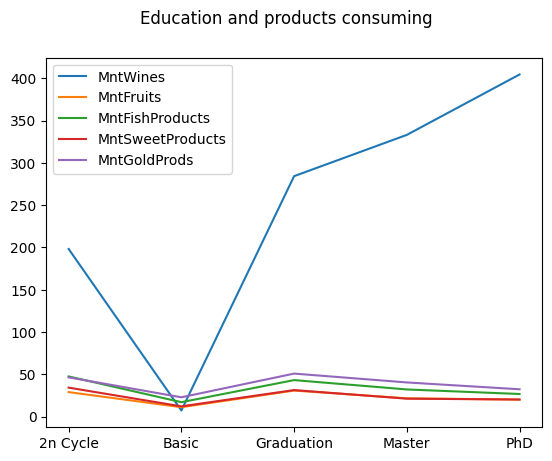

In [ ]:
# Setting a plot
plt.plot(mc_people_edu['Education'], mc_people_edu['MntWines'], label = "MntWines")
plt.plot(mc_people_edu['Education'], mc_people_edu['MntFruits'], label = "MntFruits")
plt.plot(mc_people_edu['Education'], mc_people_edu['MntFishProducts'], label = "MntFishProducts")
plt.plot(mc_people_edu['Education'], mc_people_edu['MntSweetProducts'], label = "MntSweetProducts")
plt.plot(mc_people_edu['Education'], mc_people_edu['MntGoldProds'], label = "MntGoldProds")

plt.xticks([0, 1, 2, 3, 4],['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'])
plt.legend()
plt.suptitle('Education and products consuming')

Again, people spend a lot on wine except for Basic education people. PhD people spend a lot on wine than other people. And seem like higher education that have higher demand on wine.

Leave there for now.

#### Marital_Status

In [ ]:
# create new dataset for better analyzing
mc_people_marital = mc_people[['Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby('Marital_Status').mean().reset_index()

mc_people_marital.head()

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Absurd,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000
1,Alone,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000
2,Divorced,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793
3,Married,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917
4,Single,288.331250,26.835417,182.108333,38.216667,27.262500,43.729167


In [ ]:
mc_people_marital['Marital_Status'].unique()

array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
       'Widow', 'YOLO'], dtype=object)

Text(0.5, 0.98, 'Marital_Status and products consuming')

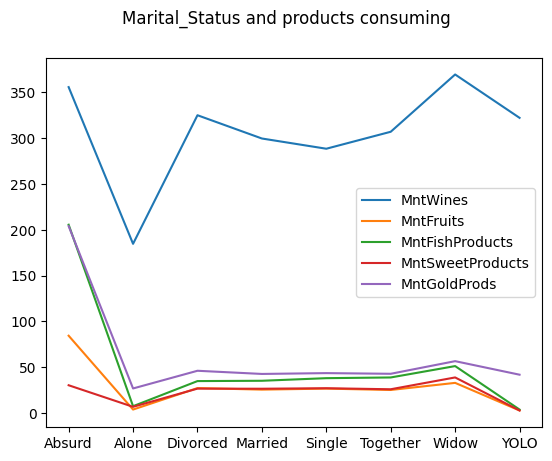

In [ ]:
# Setting a plot
plt.plot(mc_people_marital['Marital_Status'], mc_people_marital['MntWines'], label = "MntWines")
plt.plot(mc_people_marital['Marital_Status'], mc_people_marital['MntFruits'], label = "MntFruits")
plt.plot(mc_people_marital['Marital_Status'], mc_people_marital['MntFishProducts'], label = "MntFishProducts")
plt.plot(mc_people_marital['Marital_Status'], mc_people_marital['MntSweetProducts'], label = "MntSweetProducts")
plt.plot(mc_people_marital['Marital_Status'], mc_people_marital['MntGoldProds'], label = "MntGoldProds")

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7],['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO'])
plt.legend()
plt.suptitle('Marital_Status and products consuming')

In [ ]:
# If alone and single can be count as 1?
# their differences in behavior is clear
# need more comparison in other behavior

check = mc_people[['Marital_Status', 'Kidhome', 'Teenhome']].groupby('Marital_Status').mean().reset_index()

check

# Leave here for now.

,Marital_Status,Kidhome,Teenhome
0,Absurd,0.000000,0.000000
1,Alone,1.000000,0.666667
2,Divorced,0.413793,0.590517
3,Married,0.456019,0.511574
4,Single,0.464583,0.406250
5,Together,0.450000,0.529310
6,Widow,0.233766,0.636364
7,YOLO,0.000000,1.000000


#### Income

<Axes: xlabel='Income', ylabel='MntWines'>

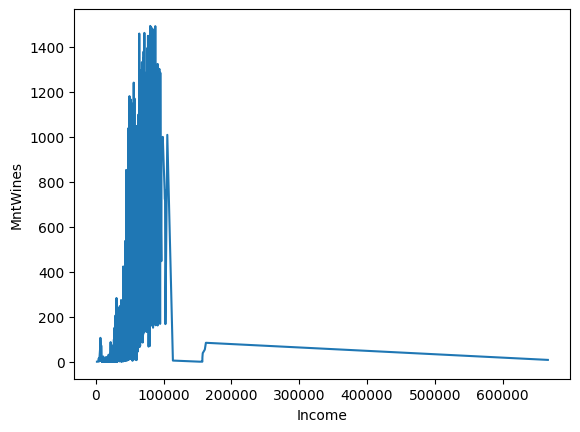

In [ ]:
sns.lineplot(data = mc_people
            , x = 'Income'
            , y = 'MntWines')

# checking outliers

In [ ]:
mc_people[mc_people['Income'] > 150000]

# there are few people have income more than 150000

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age_group
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,0,20,2,1582,1,2,1,Adults (35 - 64)
617,1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,0,85,1,16,2,1,2,Adults (35 - 64)
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,0,1,1,1,1,1,1,Adults (35 - 64)
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,0,55,16,1622,17,3,4,Adults (35 - 64)
1300,5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,0,39,1,9,2,0,8,Adults (35 - 64)
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,0,1,0,1725,2,1,1,Adults (35 - 64)
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,0,2,1,2,1,1,1,Seniors (64+)
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,0,9,14,18,8,1,12,Adults (35 - 64)


In [ ]:
# create income range
def income_range(row):
  if row['Income'] > 100000:
    return 'Higher 100000'
  elif row['Income'] > 50000:
    return '50000 - 100000'
  else:
    return '0 - 50000'

In [ ]:
# apply into dataset
mc_people['Income_range'] = mc_people.apply(income_range, axis = 1)

mc_people['Income_range']

In [ ]:
mc_people.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Age_group', 'Income_range'],
      dtype='object')

In [ ]:
# create new dataframe
mc_income = mc_people[['Income_range', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby('Income_range').mean().reset_index()

In [ ]:
mc_income.head()

,Income_range,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0 - 50000,67.646226,6.846226,34.138679,10.799057,7.002830,21.608491
1,50000 - 100000,519.478149,43.904884,284.502999,61.886033,44.974293,64.344473
2,Higher 100000,221.538462,32.538462,443.538462,29.923077,54.846154,47.230769


Text(0.5, 0.98, 'Income and products consuming')

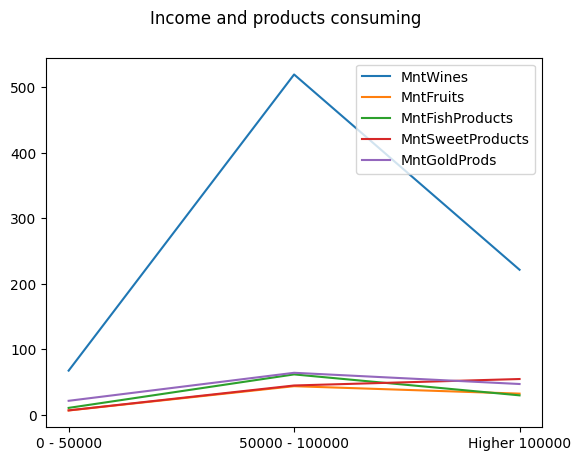

In [ ]:
# Setting a plot
plt.plot(mc_income['Income_range'], mc_income['MntWines'], label = "MntWines")
plt.plot(mc_income['Income_range'], mc_income['MntFruits'], label = "MntFruits")
plt.plot(mc_income['Income_range'], mc_income['MntFishProducts'], label = "MntFishProducts")
plt.plot(mc_income['Income_range'], mc_income['MntSweetProducts'], label = "MntSweetProducts")
plt.plot(mc_income['Income_range'], mc_income['MntGoldProds'], label = "MntGoldProds")

plt.xticks([0, 1, 2],['0 - 50000', '50000 - 100000', 'Higher 100000'])
plt.legend()
plt.suptitle('Income and products consuming')

In [ ]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul